<a href="https://colab.research.google.com/github/slowpoke000/UW_DeepLearning/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [ ]:
# Import the 'iris' dataset.
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use the first two features.
y = iris.target
x_min = min(X[:, 0])
x_max = max(X[:, 0])

In [ ]:
print(X.shape)
for i in range (150):
  print(y[i],X[i,:])

(150, 2)
0 [5.1 3.5]
0 [4.9 3. ]
0 [4.7 3.2]
0 [4.6 3.1]
0 [5.  3.6]
0 [5.4 3.9]
0 [4.6 3.4]
0 [5.  3.4]
0 [4.4 2.9]
0 [4.9 3.1]
0 [5.4 3.7]
0 [4.8 3.4]
0 [4.8 3. ]
0 [4.3 3. ]
0 [5.8 4. ]
0 [5.7 4.4]
0 [5.4 3.9]
0 [5.1 3.5]
0 [5.7 3.8]
0 [5.1 3.8]
0 [5.4 3.4]
0 [5.1 3.7]
0 [4.6 3.6]
0 [5.1 3.3]
0 [4.8 3.4]
0 [5. 3.]
0 [5.  3.4]
0 [5.2 3.5]
0 [5.2 3.4]
0 [4.7 3.2]
0 [4.8 3.1]
0 [5.4 3.4]
0 [5.2 4.1]
0 [5.5 4.2]
0 [4.9 3.1]
0 [5.  3.2]
0 [5.5 3.5]
0 [4.9 3.6]
0 [4.4 3. ]
0 [5.1 3.4]
0 [5.  3.5]
0 [4.5 2.3]
0 [4.4 3.2]
0 [5.  3.5]
0 [5.1 3.8]
0 [4.8 3. ]
0 [5.1 3.8]
0 [4.6 3.2]
0 [5.3 3.7]
0 [5.  3.3]
1 [7.  3.2]
1 [6.4 3.2]
1 [6.9 3.1]
1 [5.5 2.3]
1 [6.5 2.8]
1 [5.7 2.8]
1 [6.3 3.3]
1 [4.9 2.4]
1 [6.6 2.9]
1 [5.2 2.7]
1 [5. 2.]
1 [5.9 3. ]
1 [6.  2.2]
1 [6.1 2.9]
1 [5.6 2.9]
1 [6.7 3.1]
1 [5.6 3. ]
1 [5.8 2.7]
1 [6.2 2.2]
1 [5.6 2.5]
1 [5.9 3.2]
1 [6.1 2.8]
1 [6.3 2.5]
1 [6.1 2.8]
1 [6.4 2.9]
1 [6.6 3. ]
1 [6.8 2.8]
1 [6.7 3. ]
1 [6.  2.9]
1 [5.7 2.6]
1 [5.5 2.4]
1 [5.5 2.4]
1 [5.8 2.7]

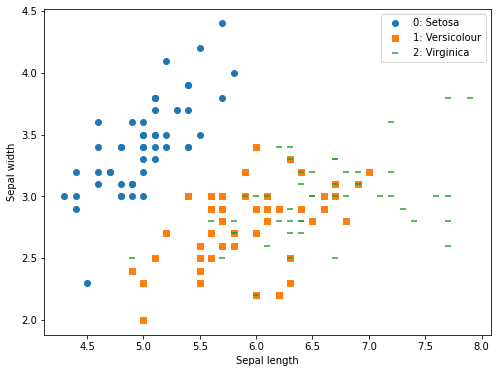

In [ ]:
# Plot the data points
def make_plot():
  plt.figure(figsize = (8,6))
  markers = ['o','s','_']
  colors = 'tab:blue', 'tab:orange', 'tab:green'
  for i, cat in enumerate(np.unique(y)):
    plt.scatter(X[:,0][y==cat], X[:,1][y==cat], c=colors[i], marker = markers[i])
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.legend(['0: Setosa', '1: Versicolour', '2: Virginica'])
make_plot()

In [ ]:
class Perceptron():

  def __init__(self):
    import random
    random.seed(100)
    self._w = [0,0]
    self._b = 0
    #self._w= [random.random(), random.random()]
    self._learning_rate = 0.01
  
  def predict(self, x, verbose = False):
    activation = np.dot(x, np.transpose(self._w)) + self._b
    prediction = 1.0 if activation > 0.0 else 0.0
    return prediction

  def accuracy(self, x, y):
    correct = 0
    print('len=',len(x))
    for i in range(len(x)):
      example_x = x[i]
      example_y = y[i]
      result = self.predict(example_x)
      #if self.predict(example_x) == example_y:
      #print('result, example:', result, example_y)
      if(result== example_y):
        correct += 1
        # print('correct',float(correct)/len(x))
    return float(correct)/len(x)

  def update_weights(self, x, target, verbose = False):
      prediction = self.predict(x)
      update = (target- prediction)
      #print('current_output, update, before w, b', prediction, update, self._w, self._b)
      self._b = self._b + self._learning_rate*update
      self._w = self._w + self._learning_rate*np.dot(update, x)
      #print('after update w, b', self._w, self._b)
    

  def train(self, x, y, num_iterations, verbose = False):
    assert(len(x) == len(y))
    for i in range(num_iterations):
      print('Iter #%d' %i)
      for j in range(len(x)):
        example_x = x[j]
        # print('example_x',example_x)
        example_y = y[j]
        self.update_weights(example_x, example_y)

      print("Weights:", self._w)
      print("Bias:", self._b)
      #print('x.shape', x.shape)
      acc = self.accuracy(x,y)
      print('Accuracy: %.3f%%' % (acc * 100))
      print()


In [ ]:
def get_shuffled_data(x,y):
  s = np.arange(x.shape[0])
  np.random.shuffle(s)

  x_shuffled = x[s]
  y_shuffled = y[s]
  return x_shuffled, y_shuffled


In [ ]:
y_two_categories = np.array([0 if i ==0 else 1 for i in y])

In [ ]:
X_shuffled, y_shuffled = get_shuffled_data(X, y_two_categories)

In [ ]:
print('X.shuffled.shape', X_shuffled.shape)
#for i in range (len(y_shuffled)):
for i in range (10):
  print('y_i, x_i', y_shuffled[i], X_shuffled[i,:])
print(np.unique(y_shuffled))

X.shuffled.shape (150, 2)
y_i, x_i 1 [6.3 2.7]
y_i, x_i 1 [6.3 2.5]
y_i, x_i 0 [5. 3.]
y_i, x_i 1 [6.3 3.3]
y_i, x_i 0 [4.6 3.6]
y_i, x_i 1 [5.6 2.8]
y_i, x_i 0 [5.5 3.5]
y_i, x_i 0 [5.1 3.4]
y_i, x_i 1 [5.5 2.3]
y_i, x_i 0 [4.8 3. ]
[0 1]


In [ ]:
p= Perceptron()
p.train(X_shuffled,y_shuffled,1000)
# p.train(X,y,1000)

Streaming output truncated to the last 5000 lines.

Iter #167
Weights: [ 0.574 -0.828]
Bias: -0.5800000000000003
len= 150
Accuracy: 99.333%

Iter #168
Weights: [ 0.585 -0.821]
Bias: -0.5800000000000003
len= 150
Accuracy: 99.333%

Iter #169
Weights: [ 0.596 -0.814]
Bias: -0.5800000000000003
len= 150
Accuracy: 99.333%

Iter #170
Weights: [ 0.607 -0.807]
Bias: -0.5800000000000003
len= 150
Accuracy: 98.667%

Iter #171
Weights: [ 0.574 -0.83 ]
Bias: -0.5900000000000003
len= 150
Accuracy: 99.333%

Iter #172
Weights: [ 0.585 -0.823]
Bias: -0.5900000000000003
len= 150
Accuracy: 99.333%

Iter #173
Weights: [ 0.596 -0.816]
Bias: -0.5900000000000003
len= 150
Accuracy: 99.333%

Iter #174
Weights: [ 0.607 -0.809]
Bias: -0.5900000000000003
len= 150
Accuracy: 98.667%

Iter #175
Weights: [ 0.574 -0.832]
Bias: -0.6000000000000003
len= 150
Accuracy: 99.333%

Iter #176
Weights: [ 0.585 -0.825]
Bias: -0.6000000000000003
len= 150
Accuracy: 99.333%

Iter #177
Weights: [ 0.596 -0.818]
Bias: -0.60000000000000

In [ ]:
def get_y_decision_boundary(x1, perceptron):
  x2 = (-self.b- self._w[1]*x1\
        )